# Homework - Random Walks (18 pts)

## Continuous random walk in three dimensions

Write a program simulating a three-dimensional random walk in a continuous space. Let 1000 independent particles all start at random positions within a cube with corners at (0,0,0) and (1,1,1). At each time step each particle will move in a random direction by a random amount between -1 and 1 along each axis (x, y, z).

1. (3 pts) Create data structure(s) to store your simulated particle positions for each of 2000 time steps and initialize them with the particles starting positions.

In [2]:
import numpy as np

n_time_pts = 2000
n = 1000
dim = 3
points = np.zeros(shape = [n_time_pts, n, dim])
points[0, :, :] = np.random.uniform(size = [n, dim])
points[0:4, ]

array([[[0.04122965, 0.51547173, 0.74596314],
        [0.88251057, 0.35411526, 0.39652268],
        [0.22689377, 0.05064872, 0.73263874],
        ...,
        [0.72120784, 0.65302023, 0.20923696],
        [0.44491907, 0.43747766, 0.18336543],
        [0.55631445, 0.26297516, 0.48844986]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.

2. (3 pts) Write code to run your simulation for 2000 time steps.

In [3]:
for t in range(1, n_time_pts):
    points[t, :, :] = points[t - 1, :, :]
    for p in range(n):
        for d in range(dim):
            points[t, p, d] += np.random.choice([-1, 1])    

3. (3 pts) Generate a series of four 3D scatter plots at selected time points to visually convey what is going on. Arrange the plots in a single row from left to right. Make sure you indicate which time points you are showing.

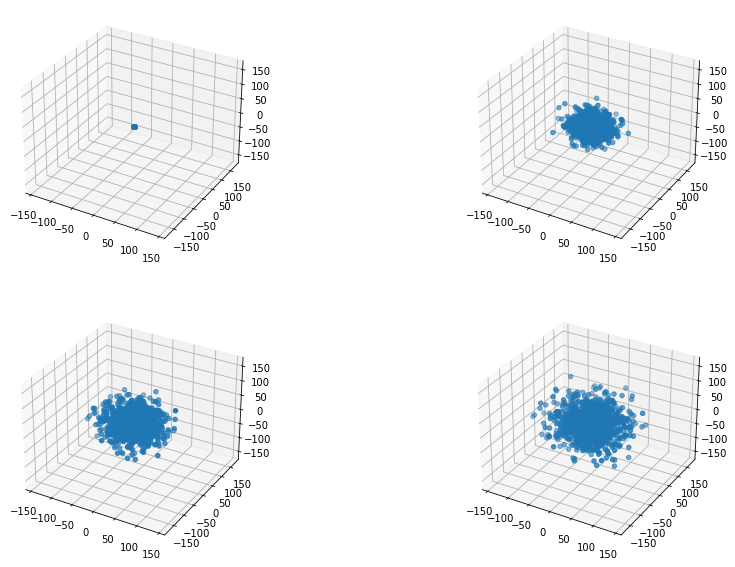

In [4]:
import matplotlib.pyplot as plt

# subset out four time points
points_sub = points[[0, 500, 1000, 1500], :, :]

# create figure
fig = plt.figure(figsize = [15, 10])
for a in range(4):
    ax = fig.add_subplot(2, 2, a+1, projection = '3d')
    ax.scatter(points_sub[a, :, 0], points_sub[a, :, 1], points_sub[a, :, 2])
    ax.set_xlim(-1.5 * points_sub[3, :, 0].max(), 1.5 * points_sub[3, :, 0].max())
    ax.set_ylim(-1.5 * points_sub[3, :, 1].max(), 1.5 * points_sub[3, :, 1].max())
    ax.set_zlim(-1.5 * points_sub[3, :, 2].max(), 1.5 * points_sub[3, :, 2].max())


4. (3 pts) Draw the path of a single particle (your choice) across all time steps in a 3D plot.

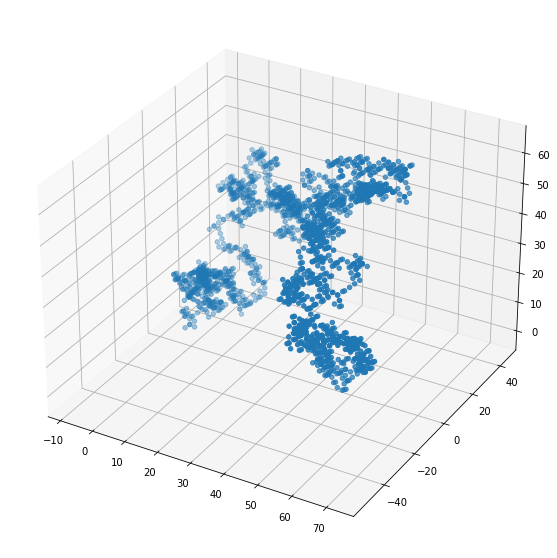

In [5]:
single_point = points[:, 500, :]
fig = plt.figure(figsize = [10, 10])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(single_point[:, 0], single_point[:, 1], single_point[:, 2])

5. (3 pts) Find the minimum, maximum, mean and variance for the jump distances of all particles throughout the entire simulation. Jump distance is the euclidean distance moved on each time step $\sqrt(dx^2+dy^2+dz^2)$. *Hint: numpy makes this very simple.*

In [8]:
distances = np.linalg.norm(points, ord = 2, axis = 2)
print(np.mean(distances))
print(np.min(distances))
print(np.max(distances))
print(np.var(distances))

47.31964031362642
0.053403430562431936
188.25461226788136
725.2630541673398


6. (3 pts) Repeat the simulation, but this time confine the particles to a unit cell of dimension 10x10x10. Make it so that if a particle leaves one edge of the cell, it enters on the opposite edge (this is the sort of thing most molecular dynamics simulations do). Show plots as in #3 to visualize the simulation (note that most interesting stuff liekly happens in the first 100 time steps).

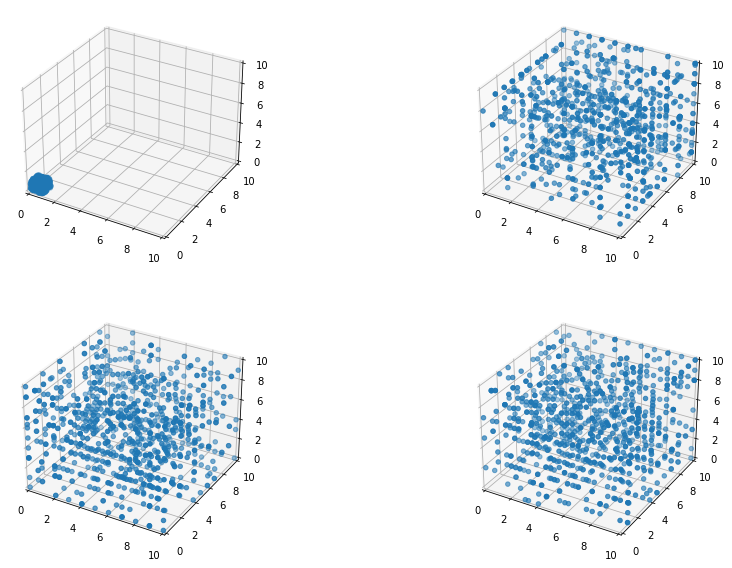

In [14]:
n_time_pts = 2000
n = 1000
dim = 3
points = np.zeros(shape = [n_time_pts, n, dim])
points[0, :, :] = np.random.uniform(size = [n, dim])
points[0:4, ]

for t in range(1, n_time_pts):
    points[t, :, :] = points[t - 1, :, :]
    for p in range(n):
        for d in range(dim):
            points[t, p, d] += np.random.choice([-1, 1])       
            if (points[t, p, d] > 10):
                points[t, p, d] = 0
            elif (points[t, p, d] < 0):
                points[t, p, d] = 10
                
# subset out four time points
points_sub = points[[0, 25, 50, 75], :, :]

# create figure
fig = plt.figure(figsize = [15, 10])
for a in range(4):
    ax = fig.add_subplot(2, 2, a + 1, projection = '3d')
    ax.scatter(points_sub[a, :, 0], points_sub[a, :, 1], points_sub[a, :, 2])
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(0, 10)